# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


In [82]:
cities

['hermanus',
 'vibo valentia',
 'waitangi',
 'port alfred',
 'adamstown',
 'nemuro',
 'avarua',
 'as sulayyil',
 'kill devil hills',
 'albany',
 'blackmans bay',
 'bilibino',
 'tobi village',
 'codrington',
 'port lincoln',
 'college',
 'papatowai',
 'edinburgh of the seven seas',
 'taiohae',
 'whitehorse',
 'sandersdorf',
 'acarau',
 'kidal',
 'punta arenas',
 'colares',
 'basco',
 'puerto natales',
 'nadi',
 'port-aux-francais',
 'susuman',
 'hamilton',
 'bethel',
 'alice springs',
 'chimoio',
 'suwayr',
 'atbasar',
 'ola',
 'talnakh',
 'ushuaia',
 'coquimbo',
 'fortuna',
 'grytviken',
 'vorgashor',
 'arica',
 'vilyuchinsk',
 'badger',
 'kavaratti',
 'puerto ayora',
 'walvis bay',
 'viedma',
 'colonia',
 'malango',
 'ilulissat',
 'sinabang',
 'fomboni',
 'toliara',
 'rawson',
 'ust-nera',
 'tangalle',
 'nagqu',
 'uturoa',
 'plastun',
 'tabas',
 'flying fish cove',
 'tiksi',
 'deori',
 'takoradi',
 'longyearbyen',
 'tehuitzingo',
 'utrik',
 'bredasdorp',
 'karratha',
 'kismayo',
 'dog

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus


Processing Record 2 of Set 1 | vibo valentia
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | nemuro
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | as sulayyil
Processing Record 9 of Set 1 | kill devil hills
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | tobi village
City not found. Skipping...
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | sandersdorf
Processing Record 22 of Set 1 | acarau
Processing Record 23 of Set 1 | kidal
Pro

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,295.26,53,52,2.98,ZA,1707550742
1,vibo valentia,38.6996,16.1274,282.48,52,100,2.71,IT,1707550742
2,waitangi,-43.9535,-176.5597,289.72,81,68,4.47,NZ,1707550743
3,port alfred,-33.5906,26.8910,296.58,69,1,3.58,ZA,1707550743
4,adamstown,-25.0660,-130.1015,298.04,93,100,13.42,PN,1707550743


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,295.26,53,52,2.98,ZA,1707550742
1,vibo valentia,38.6996,16.1274,282.48,52,100,2.71,IT,1707550742
2,waitangi,-43.9535,-176.5597,289.72,81,68,4.47,NZ,1707550743
3,port alfred,-33.5906,26.8910,296.58,69,1,3.58,ZA,1707550743
4,adamstown,-25.0660,-130.1015,298.04,93,100,13.42,PN,1707550743


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

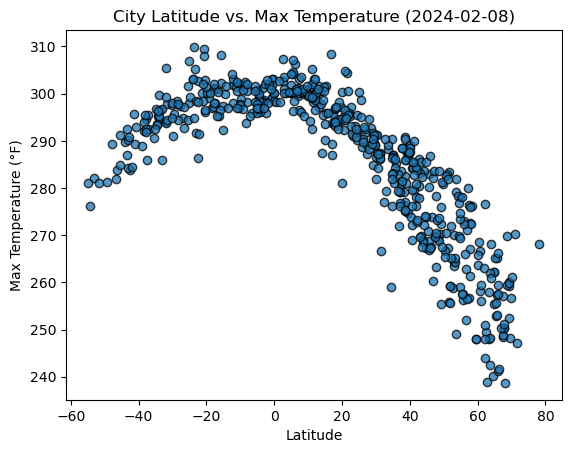

In [88]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2024-02-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

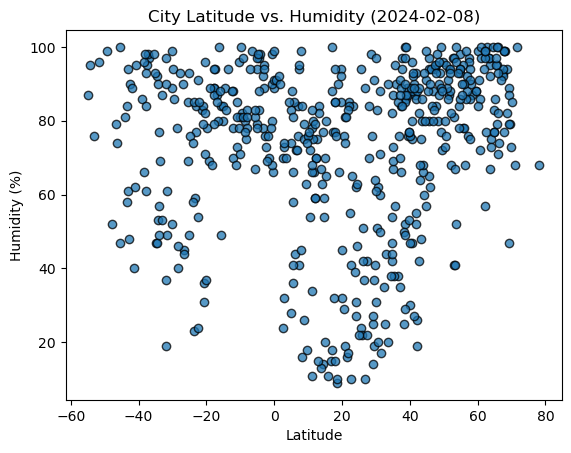

In [89]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2024-02-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

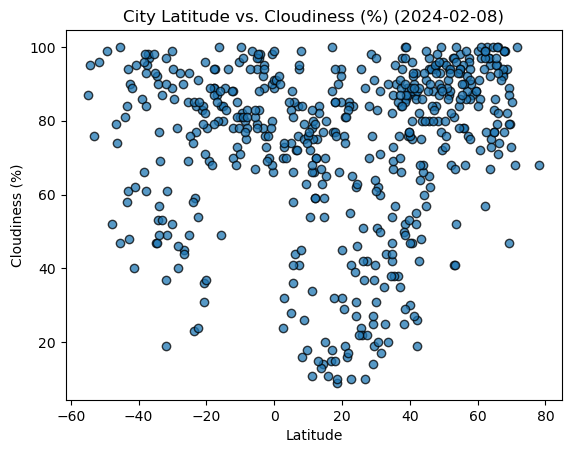

In [90]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%) (2024-02-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

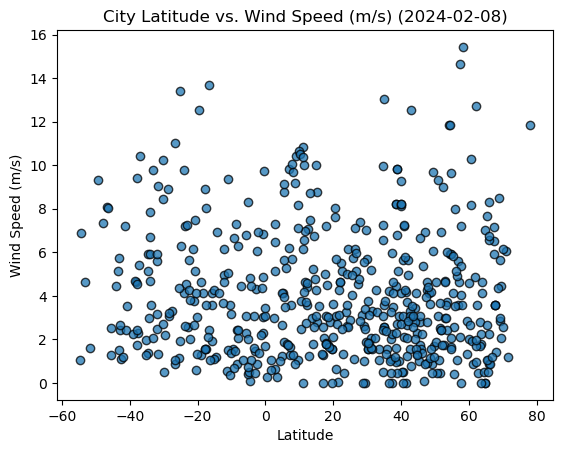

In [91]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (m/s) (2024-02-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x, y, xlabel, ylabel, title):
    """
    Create a linear regression plot.

    Parameters:
        x (array-like): The independent variable data.
        y (array-like): The dependent variable data.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create the plot
    plt.scatter(x, y, label='Data')
    plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

# Example usage:
# plot_linear_regression(x_data, y_data, "X Label", "Y Label", "Linear Regression Plot")

In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vibo valentia,38.6996,16.1274,282.48,52,100,2.71,IT,1707550742
5,nemuro,43.3236,145.5750,269.90,75,100,3.02,JP,1707550743
7,as sulayyil,20.4607,45.5779,292.29,29,0,8.04,SA,1707550743
8,kill devil hills,36.0307,-75.6760,285.36,90,40,1.54,US,1707550744
9,albany,42.6001,-73.9662,280.38,82,100,1.56,US,1707550744


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,295.26,53,52,2.98,ZA,1707550742
2,waitangi,-43.9535,-176.5597,289.72,81,68,4.47,NZ,1707550743
3,port alfred,-33.5906,26.8910,296.58,69,1,3.58,ZA,1707550743
4,adamstown,-25.0660,-130.1015,298.04,93,100,13.42,PN,1707550743
6,avarua,-21.2078,-159.7750,300.18,83,40,6.17,CK,1707550743


###  Temperature vs. Latitude Linear Regression Plot

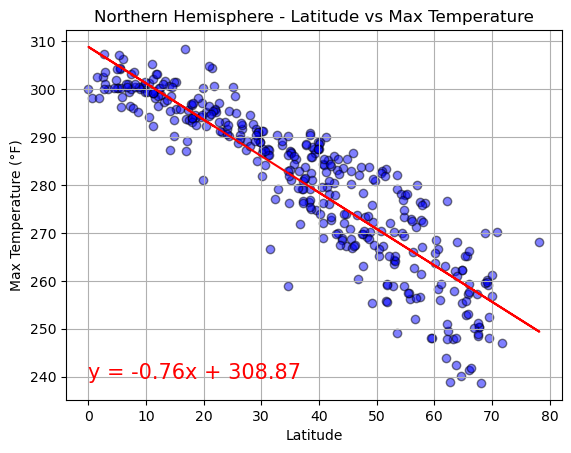

R-value is -0.90


In [95]:
# Linear regression on Northern Hemisphere
northern_hemi_df

#Define x and y variables 
x_values = northern_hemi_df ["Lat"]
y_values =  northern_hemi_df["Max Temp"]

#Call Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Calculating the regression 
regress_values = slope * x_values + intercept

#Scatter plots, plots our ordered pairs of latitude vs temp, plt.plot plots the linear regression line 
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')
plt.plot(x_values, regress_values, color='red')

# Labels x and y axis and title 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Latitude vs Max Temperature")



equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (0, 0), xytext=(0.2, 0.8), textcoords='axes fraction', fontsize=12, color='red')
plt.text(x_values.min(), y_values.min(), equation, ha='left', va='bottom', fontsize=15, color='red')

plt.grid(True)
plt.show()
print(f'R-value is {r_value:.2f}')

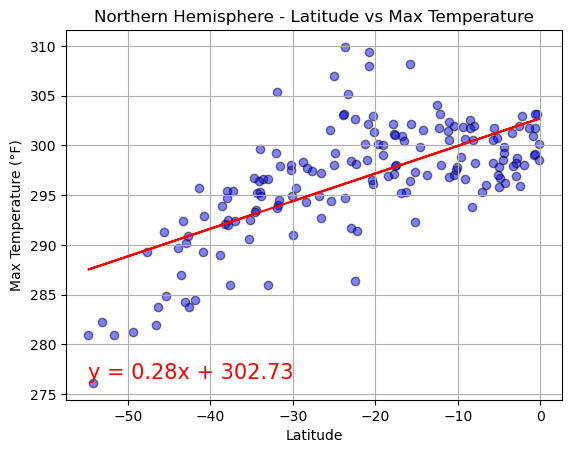

R-value is 0.68


In [96]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
southern_hemi_df

#Define x and y variables 
x_values = southern_hemi_df ["Lat"]
y_values =  southern_hemi_df["Max Temp"]

#Call Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Calculating the regression 
regress_values = slope * x_values + intercept

#Scatter plots, plots our ordered pairs of latitude vs temp, plt.plot plots the linear regression line 
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')
plt.plot(x_values, regress_values, color='red')

# Labels x and y axis and title 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Latitude vs Max Temperature")



equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equation, (0, 0), xytext=(0.2, 0.8), textcoords='axes fraction', fontsize=12, color='red')
plt.text(x_values.min(), y_values.min(), equation, ha='left', va='bottom', fontsize=15, color='red')

plt.grid(True)
plt.show()
print(f'R-value is {r_value:.2f}')

**Discussion about the linear relationship:**  There is certainly a noticeable relationship between a city's distance from the equator and the temperature of the given city. The further away from the equator the lesser the temperature on average. This makes sense intuitively as locations near the equator experience the most exposure to sun. Both data sets, for the northern and southern hemisphere show at least moderate correlations. The data for the northern hemisphere has a strong negative correlation with temperature. As the latitudinal coordinates get further away from the equator the temperature gets lower. 

On our graph for the southern hemisphere, the leftmost values on the x axis are lowest, so this graph counts up from the lowest negative latitudinal coordinates (furthest away from the equator) to zero (closest to the equator), thus the positive correlation makes sense. 

However, it is important to note the correlation in the northern hemisphere between latitudinal coordinate and temperature is much stronger than that in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

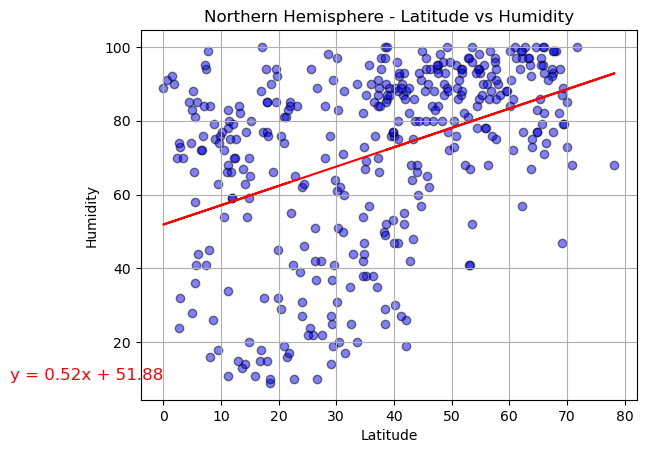

R-value is 0.41


In [97]:
# Define x and y variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Latitude vs Humidity")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='right', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")

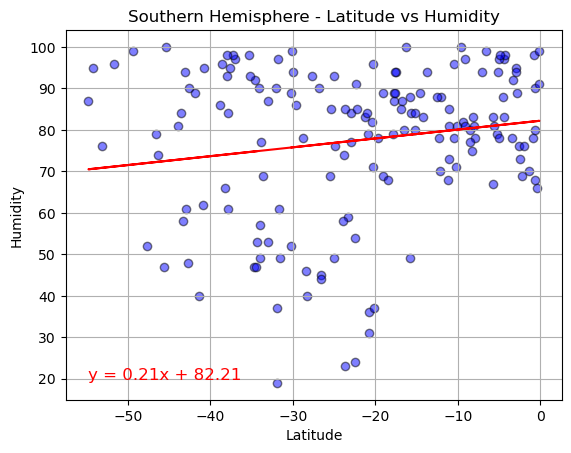

R-value is 0.17


In [98]:
# Southern Hemisphere
# Define x and y variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Latitude vs Humidity")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='left', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")

**Discussion about the linear relationship:** There is no clear linear relationship between humidity in distance from the equator. There is a moderate relationship in the northern hemisphere and none at all in the southern hemisphere. It can be said that there is not a clear relationship between distance from equator and humidity. There are likely too many confounding variables influencing this outcome. 

### Cloudiness vs. Latitude Linear Regression Plot

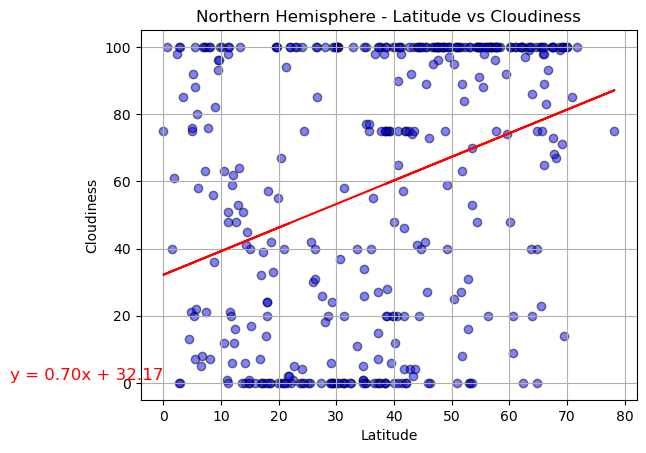

R-value is 0.33


In [99]:
# Northern Hemisphere
# Define x and y variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='right', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")

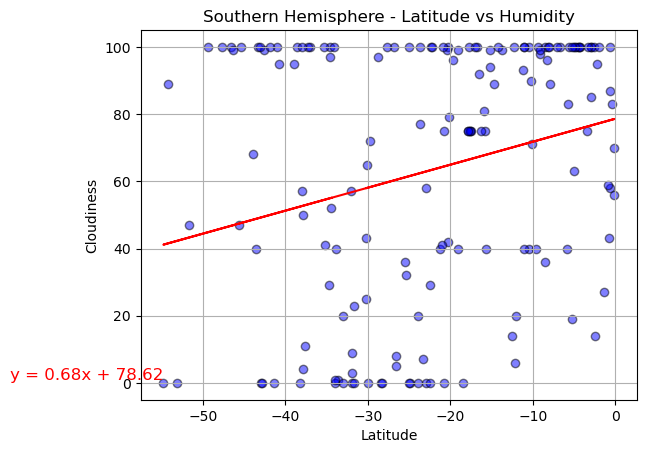

R-value is 0.25


In [100]:
# Southern Hemisphere
# Define x and y variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Latitude vs Humidity")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='right', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")


**Discussion about the linear relationship:** There is no discernible relationship between distance from the equator and the recorded cloudiness of a given location. 

### Wind Speed vs. Latitude Linear Regression Plot

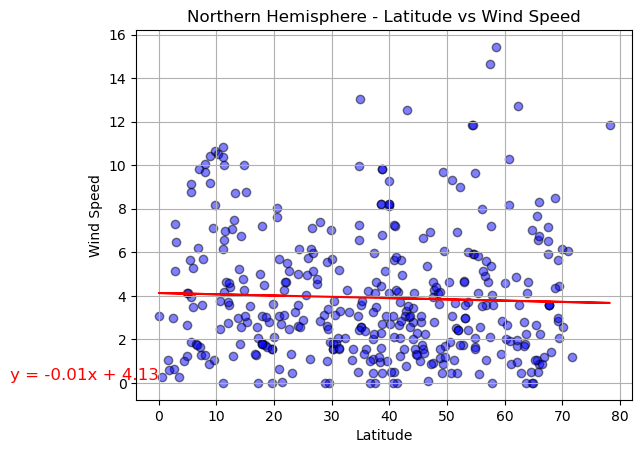

R-value is -0.04


In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='right', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")

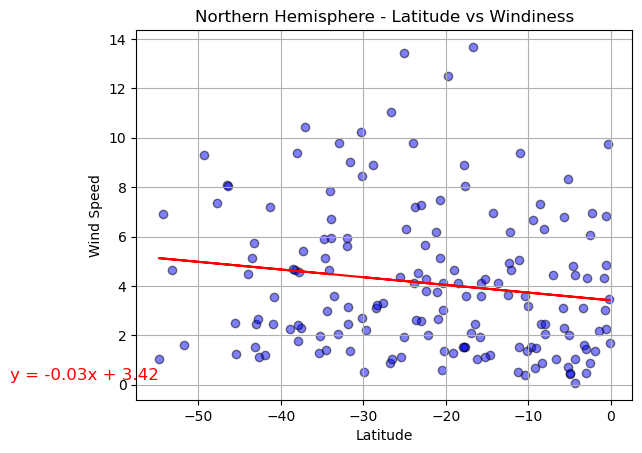

R-value is -0.15


In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line
regress_values = slope * x_values + intercept

# Scatter plot: plots latitude vs humidity
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors='black')

# Plot the linear regression line
plt.plot(x_values, regress_values, color='red')

# Labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Latitude vs Windiness")

# Add linear regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.min(), equation, ha='right', va='bottom', fontsize=12, color='red')

# Show plot
plt.grid(True)
plt.show()
print(f"R-value is {r_value:.2f}")

**Discussion about the linear relationship:** There is not a sufficient correlation between distance from the equator and recorded cloudiness. In fact in the Northern Hemisphere there is no relationship at all. This is evidenced by both the very low r values, and also the slope of the linear regression. There is a slope of -.01 and -.03! This would suggest that there is essentially no change in wind at all as the latitude changes. 


Overall, it is safe to say there is no relationship between cloudiness and distance from the equator. 